This notebook analyzes the dataset from https://www.lendingclub.com/
------------------------------------------------------------------------------------------------------





Objectives:
The goal is to analyse the following:

    The target variable
    Variable types (categorical and numerical)
    Missing data

    Numerical variables
        Discrete
        Continuous
        Distributions
        Transformations

    Categorical variables
        Cardinality
        Special Labels

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Read the data

In [2]:
data = pd.read_csv("https://s3.amazonaws.com/datarobot_public_datasets/DR_Demo_Lending_Club.csv")

In [3]:
data.sample(5)

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
5632,5633,0,LAKE AVENUE CHURCH,3,RENT,45000.0,not verified,n,Borrower added on 07/04/11 > Purpose is to e...,credit card,...,NaN,14.0,0.0,0,0.0,34.0,f,0.0,3,PC4
8978,8979,0,teksystems,1,MORTGAGE,126000.0,VERIFIED - income,n,Borrower added on 08/29/10 > card debit<br/>,debt consolidation,...,NaN,12.0,0.0,20233,37.1,27.0,f,0.0,3,PC1
8113,8114,0,Tires Plus,7,OWN,48000.0,not verified,n,Borrower added on 07/19/10 > the loan is to ...,major purchase,...,NaN,10.0,0.0,4362,49.0,25.0,f,0.0,1,PC5
4016,4017,0,Abunmdant Life Christian Center,10,MORTGAGE,22000.0,not verified,n,Borrower added on 12/06/11 > I plan to pay o...,debt consolidation,...,NaN,12.0,0.0,7467,25.7,19.0,f,0.0,2,PC2
1612,1613,1,Inova Health System,2,OWN,56000.0,VERIFIED - income,n,Borrower added on 11/25/11 > I am consolidat...,credit card,...,NaN,9.0,0.0,21905,92.4,26.0,f,0.0,2,PC3


In [4]:
data.shape

(10000, 28)

In [5]:
original_features = list(data.columns)
print(original_features)

['Id', 'is_bad', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'Notes', 'purpose_cat', 'purpose', 'zip_code', 'addr_state', 'debt_to_income', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code']


## Explore the target feature

In [6]:
target = data['is_bad']

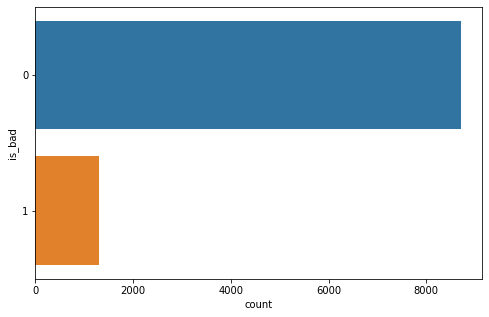

In [7]:
plt.figure(figsize=(8,5));
sns.countplot(y=target);

The dataset is very imbalance. We will process a combination of oversampling or undersampling

## Split Variable types (categorical and numerical)

In [8]:
cat_vars = [var for var in data.columns if(data[var].dtypes == "O")]
print(cat_vars)
print()
print(f"length of categorical variable is {len(cat_vars)}")

['emp_title', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'Notes', 'purpose_cat', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'policy_code']

length of categorical variable is 13


In [9]:
num_vars = [var for var in data.columns if(var not in cat_vars)]
print(num_vars)
print()
print(f"lenght of numerical variables is {len(num_vars)}")

['Id', 'is_bad', 'annual_inc', 'debt_to_income', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog']

lenght of numerical variables is 15


## Explore missing data

In [10]:
missing_data = pd.concat([data.isnull().sum().sort_values(ascending=False).rename("missing_counts"), data.isnull().mean().sort_values(ascending=False).rename("missing_percent")], axis=1)

In [11]:
missing_data

,missing_counts,missing_percent
mths_since_last_record,9160,0.9160
mths_since_last_delinq,6316,0.6316
Notes,3167,0.3167
emp_title,592,0.0592
collections_12_mths_ex_med,32,0.0032
revol_util,26,0.0026
earliest_cr_line,5,0.0005
open_acc,5,0.0005
pub_rec,5,0.0005
delinq_2yrs,5,0.0005


We will delete any feature with more than 80% missing values

In [12]:
def drop_large_missing_features(df, var):
    percent_missing = pd.DataFrame(df.isnull().mean().sort_values(ascending=False))
    percent_missing = percent_missing.where(percent_missing >= 0.80).T
    var_features = percent_missing.columns[~percent_missing.isnull().any()].tolist()
    var = var + var_features
    df = df.dropna(thresh=df.shape[1]-4, axis=0)
    return df.drop(columns=var), var

In [13]:
# data_update,  droped_features = drop_large_missing_features(data, ["Id", "Notes", "emp_title", "purpose"])

In [14]:
# update cat_vars
# cat_vars = [ele for ele in cat_vars if ele not in droped_features]

In [15]:
# data_update.shape

In [16]:
data_update = data.copy()

### Imputing categorical data

In [17]:
cat_var_for_imputing = data_update[cat_vars]

In [18]:
cat_var_for_imputing.sample(4)

,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,Notes,purpose_cat,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,policy_code
2036,Hewlett Packard,3,MORTGAGE,VERIFIED - income,n,Borrower added on 08/14/10 > Looking to cons...,other,Debt Consolidation Loan,605xx,IL,10/01/1999,f,PC5
5613,nCircle Inc,2,RENT,not verified,n,Borrower added on 05/30/11 > Wish to consoli...,debt consolidation,Debt Consolidation,939xx,CA,08/01/1996,f,PC4
1793,251 condominium,10,RENT,VERIFIED - income,n,Borrower added on 09/14/11 > I want pay off ...,debt consolidation,Debt Consolidation,104xx,NY,03/01/1993,f,PC5
3114,Ticketmaster,5,RENT,not verified,n,Borrower added on 03/05/10 > Verified email<...,car,Vehical Pay Off,958xx,CA,04/01/2000,f,PC4


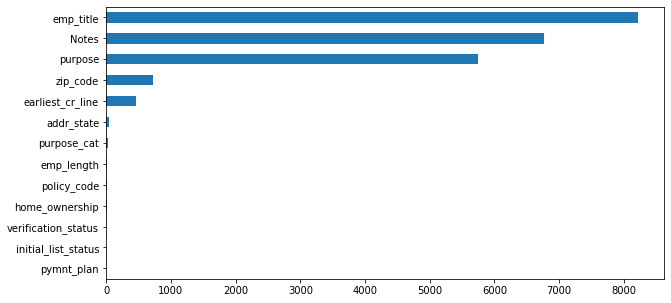

In [19]:
data_update[cat_vars].nunique().sort_values(ascending=True).plot(kind="barh", figsize=(10, 5));

In [20]:
# home_ownership_mapping = {'RENT': 3, 'MORTGAGE': 2, 'OWN': 1, 'OTHER': 0}
# data_update.home_ownership = data_update.home_ownership.map(home_ownership_mapping)

In [21]:
data_update

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,...,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using...,debt consolidation,...,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,3,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,...,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,4,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,...,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,5,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacat...",debt consolidation,...,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,Cabot,5,MORTGAGE,66250.0,VERIFIED - income,n,NaN,wedding,...,NaN,8.0,0.0,3656,24.1,10.0,f,0.0,2,PC3
9996,9997,0,Gallant & Wein,1,RENT,26000.0,VERIFIED - income source,n,Borrower added on 08/30/11 > credit cards co...,debt consolidation,...,NaN,8.0,0.0,6709,58.9,12.0,f,0.0,2,PC3
9997,9998,0,"Weichert, Realtors",8,RENT,47831.0,not verified,n,Borrower added on 03/10/10 > My dream is to ...,debt consolidation,...,111.0,9.0,1.0,11346,60.7,17.0,f,0.0,3,PC3
9998,9999,0,meadwestvaco,6,MORTGAGE,70000.0,not verified,n,NaN,major purchase,...,NaN,9.0,0.0,17157,50.9,27.0,f,0.0,2,PC3


In [22]:
# verification_status_mapping = {'not verified': 0,'VERIFIED - income': 1, 'VERIFIED - income source': 2}

In [23]:
# data_update.verification_status = data_update.verification_status.map(verification_status_mapping)

In [24]:
# data_update

In [25]:
# pymnt_plan_mapping = {'n': 0, 'y': 1}

In [26]:
# data_update.pymnt_plan = data_update.pymnt_plan.map(pymnt_plan_mapping)

In [27]:
# data_update

In [28]:
# purpose_cat_mapping = {'debt consolidation': 1,
#  'credit card': 3,
#  'other': 4,
#  'home improvement': 0,
#  'major purchase': 4,
#  'small business': 2,
#  'car': 0,
#  'wedding': 0,
#  'medical': 0,
#  'moving': 0,
#  'educational': 107,
#  'debt consolidation small business': 2,
#  'vacation': 0,
#  'house': 0,
#  'renewable energy': 0,
#  'other small business': 2,
#  'credit card small business': 2,
#  'small business small business': 2,
#  'home improvement small business': 2,
#  'major purchase small business': 2,
#  'educational small business': 2,
#  'house small business': 2,
#  'moving small business': 2,
#  'car small business': 2,
#  'wedding small business': 2,
#  'medical small business': 2,
#  'vacation small business': 2}

In [29]:
# data_update.purpose_cat = data_update.purpose_cat.map(purpose_cat_mapping)

In [30]:
# purpose_cat_mapping = {
#     'PC3': 1,
#     'PC1': 2,
#     'PC2': 3,
#     'PC4': 4,
#     'PC5': 5
#                       }

In [31]:
# data_update.policy_code = data_update.policy_code.map(purpose_cat_mapping)

In [32]:
# data_update.earliest_cr_line
data_update.earliest_cr_line = pd.DatetimeIndex(data_update['earliest_cr_line']).year

In [33]:
data_update.zip_code = data_update.zip_code.str[:3]

In [34]:
encoder = TargetEncoder(True, handle_missing='missing', handle_unknown='missing')
data_update = encoder.fit_transform(data_update, data_update['is_bad'])

In [35]:
data_update.sample(10)

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
9906,9907,1,0.129500,0.153846,0.117660,66000.0,0.150591,0.129326,0.12950,0.117198,...,NaN,12.0,0.0,35849,76.9,27.0,0.12962,0.0,2,0.145260
9592,9593,0,0.129500,0.142103,0.117660,70000.0,0.110373,0.129326,0.13167,0.080911,...,NaN,6.0,0.0,31061,68.7,25.0,0.12962,0.0,1,0.113918
4124,4125,0,0.129500,0.102719,0.117660,32004.0,0.150591,0.129326,0.13167,0.121832,...,NaN,7.0,0.0,0,0.0,13.0,0.12962,0.0,1,0.130370
9892,9893,0,0.129500,0.117130,0.117660,112992.0,0.110373,0.129326,0.13167,0.083095,...,NaN,9.0,0.0,15067,59.6,25.0,0.12962,0.0,1,0.130370
2885,2886,1,0.591537,0.153846,0.117660,57000.0,0.150591,0.129326,0.13167,0.117198,...,NaN,8.0,0.0,17205,95.6,36.0,0.12962,0.0,2,0.130370
4771,4772,0,0.129500,0.117130,0.117660,93000.0,0.150591,0.129326,0.12950,0.117198,...,NaN,11.0,0.0,11614,35.3,32.0,0.12962,0.0,2,0.131131
9392,9393,1,0.309036,0.094017,0.117660,50000.0,0.136007,0.129326,0.13167,0.136612,...,NaN,4.0,0.0,3940,85.7,15.0,0.12962,0.0,1,0.130370
1836,1837,0,0.249890,0.123762,0.138462,60000.0,0.150591,0.129326,0.12950,0.106383,...,NaN,7.0,0.0,725,33.5,9.0,0.12962,0.0,1,0.145260
2183,2184,1,0.129500,0.142103,0.117660,45100.0,0.110373,0.129326,0.12950,0.117198,...,NaN,9.0,0.0,2381,49.6,24.0,0.12962,0.0,2,0.130370
337,338,0,0.129500,0.117130,0.117660,92000.0,0.150591,0.129326,0.12950,0.117198,...,NaN,18.0,0.0,24455,58.9,52.0,0.12962,0.0,2,0.131131


In [36]:
data_update.columns.tolist()
imputer = SimpleImputer(strategy='median', 
                       fill_value = 'Missing')
imputer.fit(data_update)



SimpleImputer(fill_value='Missing', strategy='median')

In [37]:
All_data = pd.DataFrame(imputer.transform(data_update), columns=data_update.columns.tolist())

All_data.replace("NaN", "Missing")

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1.0,0.0,0.1295,0.117130,0.117660,50000.0,0.110373,0.129326,0.13167,0.136612,...,86.0,15.0,0.0,12087.0,12.1,44.0,0.12962,0.0,1.0,0.131131
1,2.0,0.0,0.1295,0.142103,0.138462,39216.0,0.110373,0.129326,0.12950,0.117198,...,86.0,4.0,0.0,10114.0,64.0,5.0,0.12962,0.0,2.0,0.127907
2,3.0,0.0,0.1295,0.111361,0.138462,65000.0,0.110373,0.129326,0.13167,0.080911,...,86.0,4.0,0.0,81.0,0.6,8.0,0.12962,0.0,3.0,0.131131
3,4.0,0.0,0.1295,0.117130,0.117660,57500.0,0.110373,0.129326,0.13167,0.117198,...,86.0,6.0,0.0,10030.0,37.1,23.0,0.12962,0.0,2.0,0.145260
4,5.0,0.0,0.1295,0.117130,0.117660,50004.0,0.150591,0.129326,0.12950,0.117198,...,86.0,8.0,0.0,10740.0,40.4,21.0,0.12962,0.0,3.0,0.113918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,0.0,0.1295,0.133504,0.117660,66250.0,0.150591,0.129326,0.13167,0.056000,...,86.0,8.0,0.0,3656.0,24.1,10.0,0.12962,0.0,2.0,0.113918
9996,9997.0,0.0,0.1295,0.142103,0.138462,26000.0,0.136007,0.129326,0.12950,0.117198,...,86.0,8.0,0.0,6709.0,58.9,12.0,0.12962,0.0,2.0,0.113918
9997,9998.0,0.0,0.1295,0.094017,0.138462,47831.0,0.110373,0.129326,0.12950,0.117198,...,111.0,9.0,1.0,11346.0,60.7,17.0,0.12962,0.0,3.0,0.113918
9998,9999.0,0.0,0.1295,0.121495,0.117660,70000.0,0.110373,0.129326,0.13167,0.093407,...,86.0,9.0,0.0,17157.0,50.9,27.0,0.12962,0.0,2.0,0.113918


## Numerical variables

In [38]:
All_data.sample(10)

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
6903,6904.0,0.0,0.129500,0.102719,0.117660,51000.0,0.136007,0.129326,0.13167,0.080911,...,86.0,9.0,0.0,5936.0,78.8,12.0,0.12962,0.0,3.0,0.130370
2513,2514.0,0.0,0.129500,0.153846,0.138462,24996.0,0.110373,0.129326,0.13167,0.117198,...,86.0,3.0,0.0,2184.0,52.0,11.0,0.12962,0.0,3.0,0.145260
5555,5556.0,0.0,0.129500,0.128266,0.117660,182000.0,0.150591,0.129326,0.12950,0.121832,...,86.0,5.0,0.0,6531.0,69.5,13.0,0.12962,0.0,2.0,0.131131
2783,2784.0,0.0,0.015437,0.117130,0.117660,72000.0,0.136007,0.129326,0.13167,0.080911,...,86.0,25.0,0.0,7402.0,42.8,38.0,0.12962,0.0,3.0,0.113918
2330,2331.0,0.0,0.129500,0.117130,0.143226,42996.0,0.136007,0.129326,0.12950,0.117198,...,86.0,5.0,0.0,16430.0,80.1,12.0,0.12962,0.0,3.0,0.131131
3717,3718.0,0.0,0.129500,0.123762,0.143226,39000.0,0.136007,0.129326,0.13167,0.093407,...,86.0,4.0,0.0,1936.0,66.8,29.0,0.12962,0.0,2.0,0.127907
7746,7747.0,1.0,0.400357,0.117130,0.143226,38000.0,0.150591,0.129326,0.12950,0.107500,...,53.0,10.0,1.0,4675.0,35.2,15.0,0.12962,0.0,1.0,0.145260
4435,4436.0,0.0,0.129500,0.121495,0.138462,60000.0,0.110373,0.129326,0.13167,0.117198,...,62.0,5.0,1.0,2462.0,21.8,17.0,0.12962,0.0,1.0,0.130370
8345,8346.0,1.0,0.129500,0.133504,0.138462,50000.0,0.110373,0.129326,0.13167,0.121832,...,86.0,3.0,0.0,97.0,13.9,9.0,0.12962,0.0,1.0,0.131131
5723,5724.0,0.0,0.129500,0.117130,0.138462,34000.0,0.110373,0.129326,0.12950,0.117198,...,86.0,7.0,0.0,12830.0,82.8,16.0,0.12962,0.0,3.0,0.130370


In [39]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(All_data), columns=All_data.columns.to_list())

In [40]:
sm = SMOTE(
    sampling_strategy='auto',  
    random_state=42, 
    k_neighbors=5,
    n_jobs=4
)

X_sm, y_sm = sm.fit_resample(scaled_data.drop(columns=["is_bad"]), scaled_data["is_bad"])

In [41]:
tl = TomekLinks(
    sampling_strategy='all',
    n_jobs=4)

smtomek = SMOTETomek(
    sampling_strategy='auto',  
    random_state=42, 
    smote=sm,
    tomek=tl,
    n_jobs=4
)

X_smtl, y_smtl = smtomek.fit_resample(scaled_data.drop(columns=["is_bad"]), scaled_data["is_bad"])



In [47]:
X_smtl

,Id,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,0.000000,0.169085,0.025960,0.000517,0.053452,0.000000,0.0,0.353172,0.085394,0.141154,...,0.722689,0.368421,0.000000,0.010011,0.120278,0.483146,1.0,0.0,0.00000,0.549188
1,0.000100,0.169085,0.054009,0.813741,0.041443,0.000000,0.0,0.345257,0.064828,0.008019,...,0.722689,0.078947,0.000000,0.008377,0.636183,0.044944,1.0,0.0,0.50000,0.446334
2,0.000200,0.169085,0.019480,0.813741,0.070156,0.000000,0.0,0.353172,0.026389,0.169085,...,0.722689,0.078947,0.000000,0.000067,0.005964,0.078652,1.0,0.0,1.00000,0.549188
3,0.000300,0.169085,0.025960,0.000517,0.061804,0.000000,0.0,0.353172,0.064828,0.167963,...,0.722689,0.131579,0.000000,0.008307,0.368787,0.247191,1.0,0.0,0.50000,1.000000
4,0.000400,0.169085,0.025960,0.000517,0.053457,1.000000,0.0,0.345257,0.064828,0.000000,...,0.722689,0.184211,0.000000,0.008895,0.401590,0.224719,1.0,0.0,1.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17377,0.212526,0.522737,0.037355,0.000517,0.171031,0.000000,0.0,0.345257,0.062861,0.149895,...,0.722689,0.219494,0.000000,0.050856,0.373566,0.275169,1.0,0.0,0.59577,0.000000
17378,0.485335,0.169085,0.029629,0.813741,0.048846,0.000000,0.0,0.351906,0.058584,0.260621,...,0.722689,0.118952,0.000000,0.003933,0.254400,0.110562,1.0,0.0,0.00000,1.000000
17379,0.544713,0.169085,0.048287,0.813741,0.014229,0.637362,0.0,0.350973,0.068374,0.165640,...,0.722689,0.096489,0.000000,0.003884,0.711012,0.076779,1.0,0.0,0.00000,0.474903
17380,0.685328,0.169085,0.033409,0.813741,0.068863,1.000000,0.0,0.350561,0.056516,0.169085,...,0.457994,0.114220,0.446789,0.001953,0.901192,0.142599,1.0,0.0,0.50000,0.000000


In [48]:
y_smtl

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17377    1.0
17378    1.0
17379    1.0
17380    1.0
17381    1.0
Name: is_bad, Length: 17382, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_smtl, y_smtl, test_size=0.33, random_state=42)

In [50]:
X_train

,Id,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
1843,0.184518,0.169085,0.033409,0.000517,0.075724,1.000000,0.0,0.345257,0.064828,0.169085,...,0.722689,0.289474,0.0,0.018626,0.833996,0.247191,1.0,0.0,0.5,0.524931
13856,0.253091,0.280581,0.033409,0.813741,0.024427,1.000000,0.0,0.353172,0.064828,0.224525,...,0.722689,0.117639,0.0,0.008124,0.356176,0.137019,1.0,0.0,0.0,1.000000
7333,0.734773,0.169085,0.025960,0.000517,0.070156,0.000000,0.0,0.353172,0.069738,0.093263,...,0.722689,0.078947,0.0,0.002827,0.847913,0.191011,1.0,0.0,0.0,0.524931
16112,0.849097,0.169085,0.029605,0.000517,0.051794,0.000000,0.0,0.350851,0.046296,0.169085,...,0.722689,0.193313,0.0,0.002482,0.163380,0.106953,1.0,0.0,0.0,0.446334
1285,0.128713,0.045474,0.019480,0.000517,0.049000,0.000000,0.0,0.345257,0.064828,0.169085,...,0.722689,0.368421,0.0,0.017469,0.932406,0.280899,1.0,0.0,0.0,0.524931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.883447,0.197357,0.033828,0.000517,0.063245,0.956263,0.0,0.346211,0.192537,0.185032,...,0.722689,0.055805,0.0,0.006567,0.685801,0.325277,1.0,0.0,0.0,0.546262
11964,0.712124,0.164725,0.025960,0.813741,0.070156,1.000000,0.0,0.346694,0.065720,0.169085,...,0.722689,0.284694,0.0,0.044014,0.499681,0.614927,1.0,0.0,0.0,1.000000
5390,0.540154,0.169085,0.000000,0.000517,0.192650,0.637362,0.0,0.345257,0.039626,0.169085,...,0.722689,0.210526,0.0,0.004504,0.397614,0.213483,1.0,0.0,0.0,0.549188
860,0.086209,0.045474,0.019480,0.813741,0.089254,1.000000,0.0,0.345257,0.026389,0.169085,...,0.722689,0.131579,0.0,0.003813,0.487078,0.202247,1.0,0.0,1.0,0.549188


In [51]:
y_train

1843     0.0
13856    1.0
7333     1.0
16112    1.0
1285     0.0
        ... 
11284    1.0
11964    1.0
5390     0.0
860      0.0
15795    1.0
Name: is_bad, Length: 11645, dtype: float64

In [43]:
# import numpy as np
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
# from sklearn.svm import SVC
# clf = SVC(gamma='auto')
# clf.fit(X_train, y_train)


SVC(gamma='auto')

In [44]:
# y_pred = clf.predict(X_test)

In [45]:
# confusion_matrix(y_test, y_pred)

array([[2321,  605],
       [ 740, 2071]])

/home/main/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


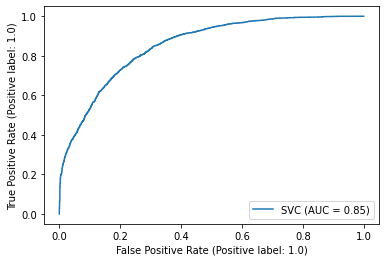

In [46]:
# from sklearn import datasets, metrics
# metrics.plot_roc_curve(clf, X_test, y_test);